# Creating Eco Zones for Sonoma County

### This notebook was used to create example maps of the types of data looked at in each EPA ecoregion.

In [5]:
#import libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import util
import matplotlib.pyplot as plt

In [21]:
#path to clean data folder
clean_data = "../data/clean/"
raw_data = "../data/raw/"

# Sonoma county boundary
soco_bound = gpd.read_file(clean_data + "sonoma_county_boundary/sonoma_county_boundary.shp")
# ca state boundary
ca_state = gpd.read_file(clean_data + "ca_state_boundary/ca_state_boundary.shp")
# Sonoma Veg
sonoma_veg = gpd.read_file(raw_data + "Sonoma_County_Veg_Map_Shp/Sonoma_Veg_Map_5_1.shp")
sonoma_veg_simp = gpd.read_file(clean_data + "sonoma_veg/sonoma_veg.shp")
# CA EPA eco regions
ecoregions = gpd.read_file(clean_data + "soco_ecoregion_l4/soco_ecoregion_l4.shp")
# Land use 
landuse = gpd.read_file(raw_data + "soco_landuse/soco_landuse.shp") 
# MTC data
mtc_thresh = gpd.read_file(clean_data + "mtc/mtc_thresh.shp")
mtc_thresh_sum = gpd.read_file(clean_data + "mtc/mtc_thresh_sum.shp")

In [24]:
# change crs 
ca_state = ca_state.to_crs(epsg=2226)
soco_bound = soco_bound.to_crs(epsg=2226)

In [6]:
# just get the eco region of of interest
ecoregions_simp = util.simplify_ecoregions(ecoregions)
eoi = ecoregions[ecoregions["US_L4NAME"].isin({'Point Reyes/Farallon Islands', 'Bodega Coastal Hills', 'Marin Hills'})]
eoi.head()

In [ ]:
# get the extent of the eoi for mapping
xlim = ([eoi.total_bounds[0],  eoi.total_bounds[2]])
ylim = ([eoi.total_bounds[1],  eoi.total_bounds[3]])

In [20]:
# get the extent for the county
xlim_soco = ([ecoregions_simp.total_bounds[0] - 0.009e6,  ecoregions_simp.total_bounds[2] +  0.009e6])
ylim_soco = ([ecoregions_simp.total_bounds[1] - 0.009e6,  ecoregions_simp.total_bounds[3] +  0.009e6])

### Sonoma Veg

In [22]:
# set the colors
from matplotlib.colors import ListedColormap
colors = ["peru", "blue", "red", "grey", "green", "bisque", "yellow"]
cmap=ListedColormap(colors)

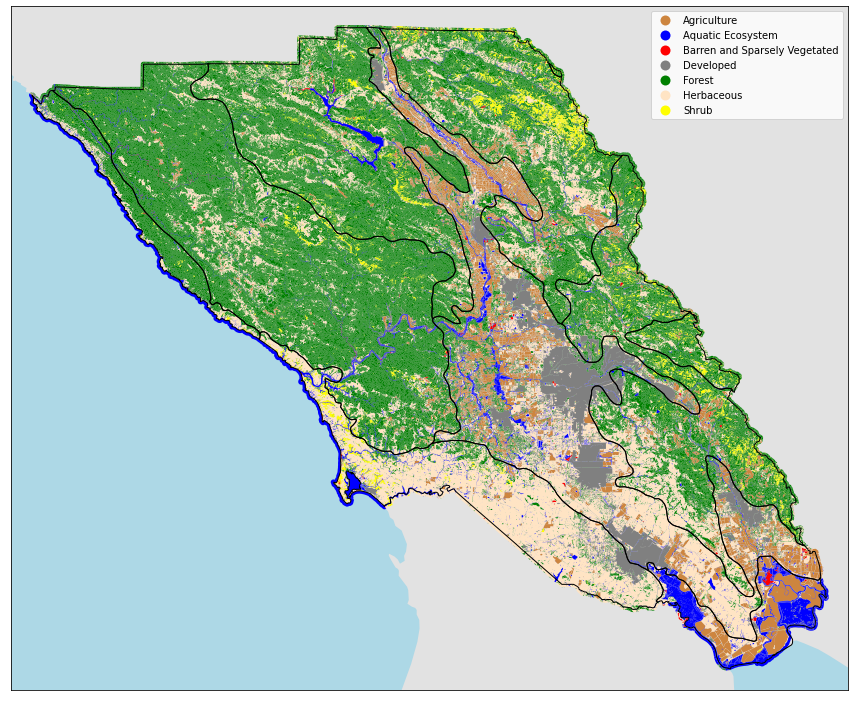

In [25]:
# map of whole county vegetation
fig, ax = plt.subplots(figsize=(15,15))
ca_state.plot(ax=ax, color = "#e2e2e2")
sonoma_veg_simp.plot(ax=ax, column="natural_si", cmap=cmap, legend = True)
ecoregions_simp.plot(ax=ax, color = "None",  edgecolor = "black")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(xlim_soco)
ax.set_ylim(ylim_soco)
ax.set_facecolor('#add8e6')

In [40]:
# crop sonoma veg to the eoi
veg_eoi = gpd.overlay(sonoma_veg, eoi, how='intersection') 
veg_eoi_simp = gpd.overlay(sonoma_veg_simp, eoi, how='intersection')

(1827444.2442471823, 1945103.4301287688)

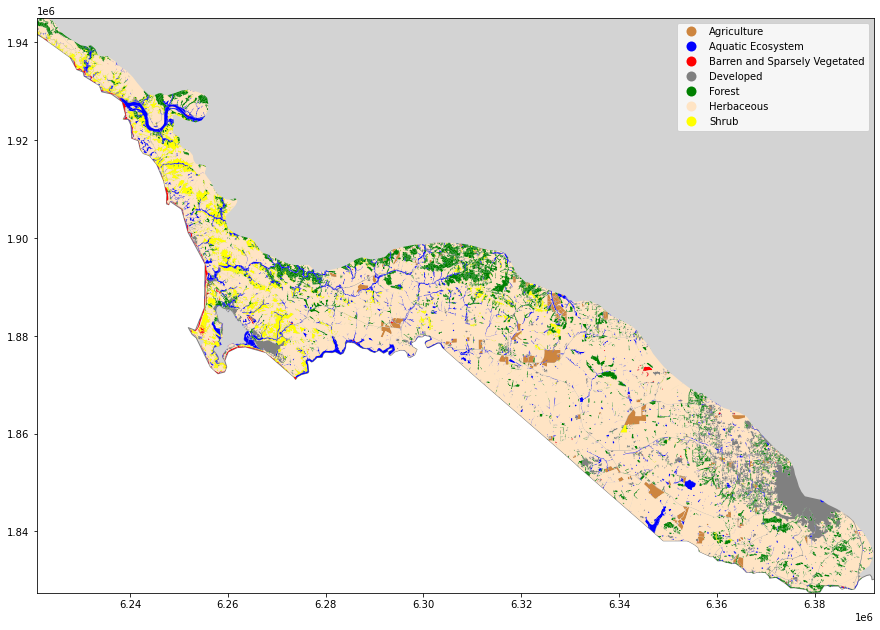

In [47]:
# plot the simplified sonoma veg data
fig, ax = plt.subplots(figsize=(15,15))
soco_bound.plot(ax=ax, edgecolor = "grey", color = "#D3D3D3")
veg_eoi_simp.plot(ax=ax, column = "natural_si", cmap=cmap, legend = True)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [35]:
veg_eoi_herb_shrub = veg_eoi[veg_eoi["MAP_CLASS"].isin({
        'California Annual and Perennial Grassland Macrogroup',
        'California Coastal Evergreen Bluff and Dune Scrub Group',
        'Native and Non-native Perennial Coastal Grassland Mapping Unit'})]

(1827444.2442471823, 1945103.4301287688)

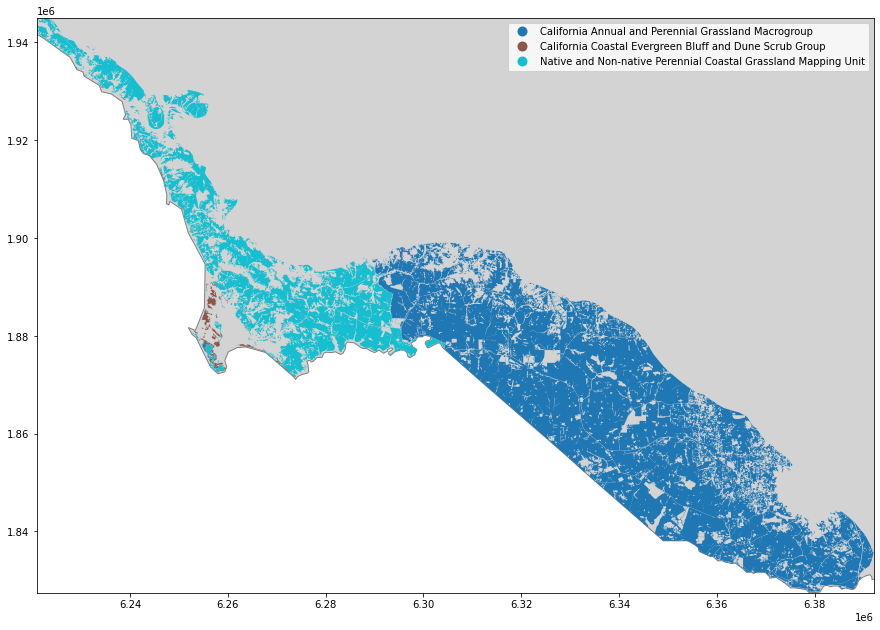

In [36]:
# plot the sonoma veg map classes 
fig, ax = plt.subplots(figsize=(15,15))
soco_bound.plot(ax=ax, edgecolor = "grey", color = "#D3D3D3")
veg_eoi_herb_shrub.plot(ax=ax, column = "MAP_CLASS", legend = True)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

### Landuse

In [49]:
# crop landuse
landuse_eoi = gpd.overlay(landuse, eoi, how='intersection') 

In [50]:
landuse_eoi.head()

,OBJECTID_1,LAND_USE,DESIGNATIO,DENSITY,Shape_Leng_1,Shape_Area_1,OBJECTID_2,US_L4CODE,US_L4NAME,US_L3CODE,...,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,1,DA 10,DA,10,2348.456540,3.314426e+05,6404,6n,Bodega Coastal Hills,6,...,06,097,01657246,0500000US06097,06097,Sonoma,06,4.080764e+09,498182342.0,"POLYGON ((6388558.780 1839342.345, 6388511.345..."
1,3,DA 10,DA,10,10981.327365,7.224392e+06,6404,6n,Bodega Coastal Hills,6,...,06,097,01657246,0500000US06097,06097,Sonoma,06,4.080764e+09,498182342.0,"POLYGON ((6359115.790 1850620.485, 6359159.990..."
2,24,DA 10,DA,10,3353.627984,6.628564e+05,6404,6n,Bodega Coastal Hills,6,...,06,097,01657246,0500000US06097,06097,Sonoma,06,4.080764e+09,498182342.0,"POLYGON ((6351148.842 1863687.308, 6350853.550..."
3,25,DA 10,DA,10,4769.608892,1.414737e+06,6404,6n,Bodega Coastal Hills,6,...,06,097,01657246,0500000US06097,06097,Sonoma,06,4.080764e+09,498182342.0,"POLYGON ((6352467.642 1863668.200, 6352316.792..."
4,26,DA 10,DA,10,5437.833015,1.373192e+06,6404,6n,Bodega Coastal Hills,6,...,06,097,01657246,0500000US06097,06097,Sonoma,06,4.080764e+09,498182342.0,"POLYGON ((6354068.950 1864263.275, 6354069.625..."


(1827444.2442471823, 1945103.4301287688)

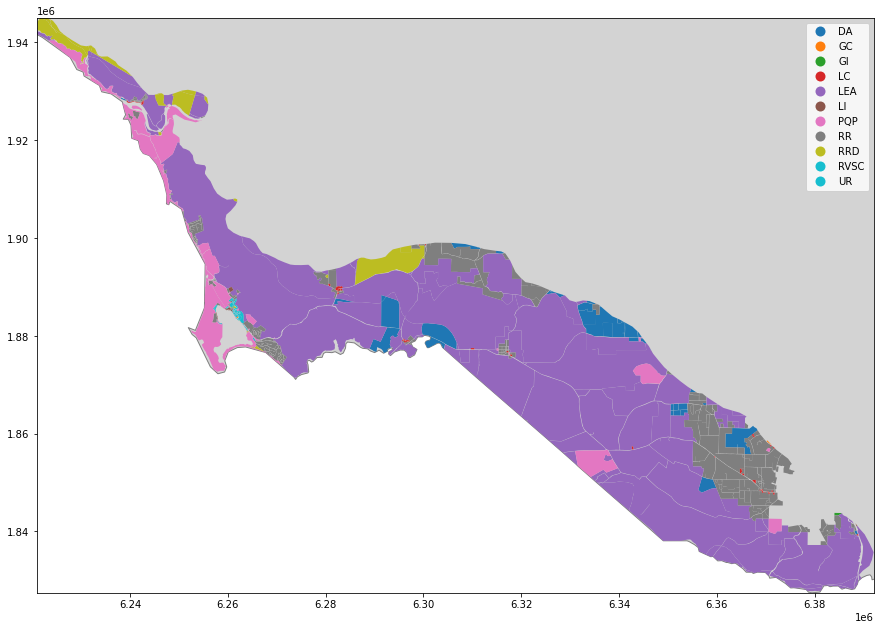

In [51]:
fig, ax = plt.subplots(figsize=(15,15))
soco_bound.plot(ax=ax, edgecolor = "grey", color = "#D3D3D3")
landuse_eoi.plot(ax=ax, column = "DESIGNATIO", legend = True)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

### MTC data

In [3]:
mtc_thresh_sum = mtc_thresh_sum.to_crs(epsg=2226)

In [81]:
mtc_thresh_sum.head()

,tract,passed_thr,geometry
0,150100,2,"MULTIPOLYGON (((6431596.529 1805517.379, 64317..."
1,150202,1,"POLYGON ((6424576.597 1873543.889, 6424847.178..."
2,150203,2,"POLYGON ((6426996.470 1866240.979, 6429599.410..."
3,150204,2,"POLYGON ((6433789.822 1868012.097, 6434771.147..."
4,150303,2,"POLYGON ((6398560.547 1881620.606, 6398577.903..."


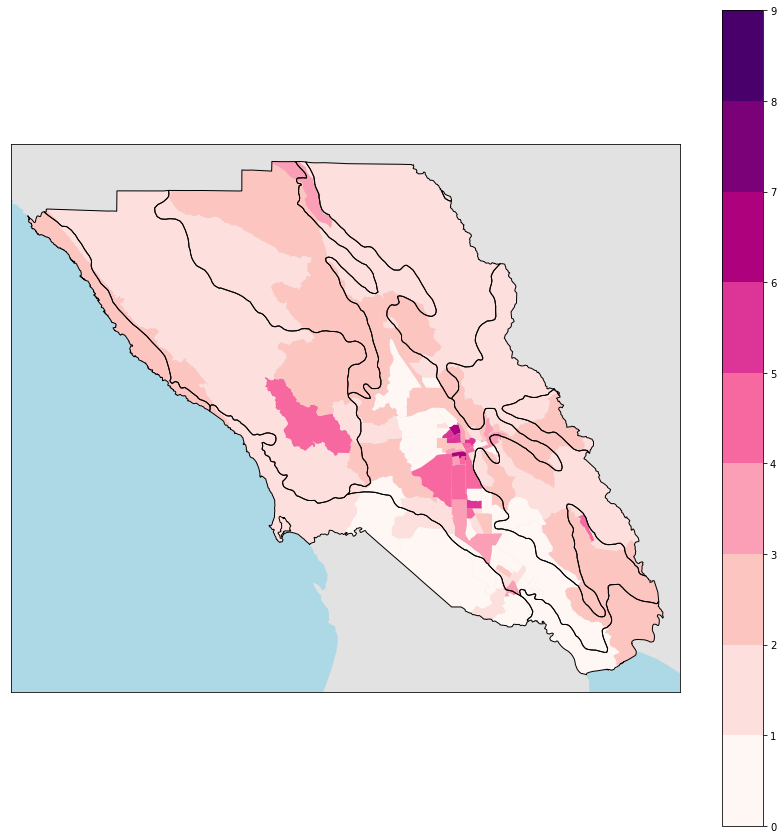

In [19]:
# plot over the whole county
fig, ax = plt.subplots(figsize=(15,15))
ca_state.plot(ax=ax, color = "#e2e2e2")
mtc_thresh_sum.plot(ax=ax, column="passed_thr", cmap=plt.cm.get_cmap('RdPu', 9), edgecolor="None", 
                    figsize = (12,10), vmin = 0, vmax =9, legend = True)
ecoregions_simp.plot(ax=ax, color = "None",  edgecolor = "black")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(xlim_soco)
ax.set_ylim(ylim_soco)
ax.set_facecolor('#add8e6')

(1827444.2442471823, 1945103.4301287688)

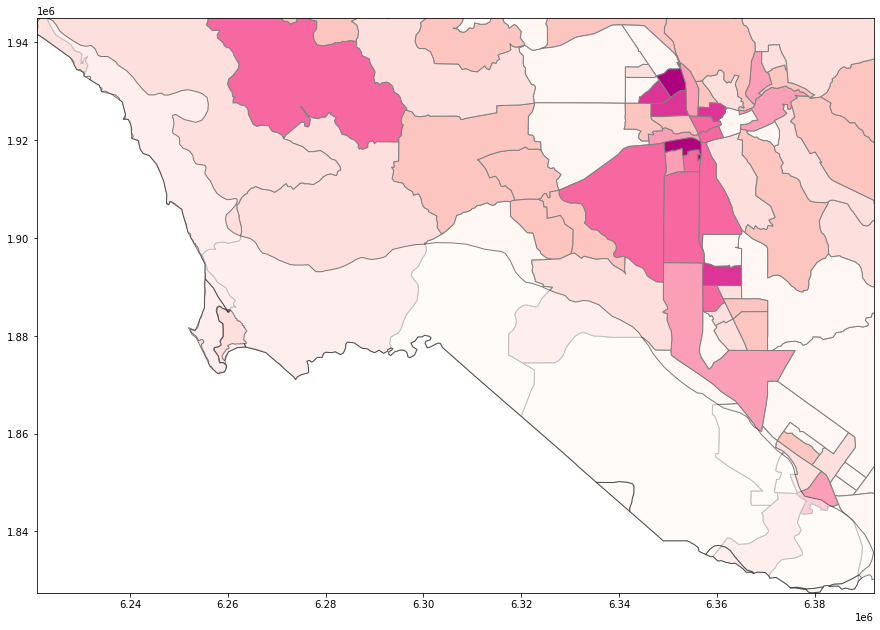

In [71]:
fig, ax = plt.subplots(figsize=(15,15))
mtc_thresh_sum.plot(ax=ax, column="passed_thr", cmap=plt.cm.get_cmap('RdPu', 9), edgecolor="grey", 
                    figsize = (12,10), vmin = 0, vmax =9)
eoi.plot(ax=ax, color = "white",  edgecolor = "black", alpha = 0.5)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [75]:
mtc_thresh = mtc_thresh.to_crs(epsg=2226)

In [79]:
# look at what demographic factors there are only in the ecoregion
mtc_thresh_eoi = gpd.overlay(mtc_thresh, eoi, how='intersection') 

In [80]:
mtc_thresh_eoi = mtc_thresh_eoi[mtc_thresh_eoi["passed_thr"] == 1]


,tract,indicators,passed_thr,OBJECTID,US_L4CODE,US_L4NAME,US_L3CODE,US_L3NAME,NA_L3CODE,NA_L3NAME,...,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
1,150800,over75_1_2,1,6363,6o,Marin Hills,6,Central California Foothills and Coastal Mount...,11.1.1,"California Coastal Sage, Chaparral, and Oak Wo...",...,06,097,01657246,0500000US06097,06097,Sonoma,06,4.080764e+09,498182342.0,"POLYGON ((6360897.762 1837018.933, 6361755.545..."
34,150800,over75_1_2,1,6404,6n,Bodega Coastal Hills,6,Central California Foothills and Coastal Mount...,11.1.1,"California Coastal Sage, Chaparral, and Oak Wo...",...,06,097,01657246,0500000US06097,06097,Sonoma,06,4.080764e+09,498182342.0,"POLYGON ((6361188.629 1837389.137, 6362119.343..."
45,154303,over75_1_2,1,6404,6n,Bodega Coastal Hills,6,Central California Foothills and Coastal Mount...,11.1.1,"California Coastal Sage, Chaparral, and Oak Wo...",...,06,097,01657246,0500000US06097,06097,Sonoma,06,4.080764e+09,498182342.0,"POLYGON ((6223103.487 1944741.929, 6223489.870..."
89,150701,below2_1_2,1,6404,6n,Bodega Coastal Hills,6,Central California Foothills and Coastal Mount...,11.1.1,"California Coastal Sage, Chaparral, and Oak Wo...",...,06,097,01657246,0500000US06097,06097,Sonoma,06,4.080764e+09,498182342.0,"POLYGON ((6377251.217 1848210.247, 6377293.351..."
91,150901,below2_1_2,1,6404,6n,Bodega Coastal Hills,6,Central California Foothills and Coastal Mount...,11.1.1,"California Coastal Sage, Chaparral, and Oak Wo...",...,06,097,01657246,0500000US06097,06097,Sonoma,06,4.080764e+09,498182342.0,"POLYGON ((6376451.161 1847896.644, 6375768.471..."
